##Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

##Loading the Data


In [2]:
# Defining directory paths for training and testing images
train_dir = "/content/drive/MyDrive/Apziva_Projects/MonReader_images/MonReader/training"
test_dir = "/content/drive/MyDrive/Apziva_Projects/MonReader_images/MonReader/testing"

## Create a Dataset

######The tf.keras.utils.image_dataset_from_directory is a Keras pre-processing tool used for creating a tf.data.Dataset from a directory containing image files. This function streamlines the process of reading images, decoding them, and assigning labels based on the structure of the directory. It automatically handles the retrieval of all image files, their decoding, and the labeling process according to the folders they reside in. Additionally, the function offers options for shuffling and resizing images, providing a convenient and efficient means for preparing image datasets within a machine learning pipeline.

##### To efficiently handle image data and labels, we utilize the tf.keras.utils.image_dataset_from_directory function from Keras preprocessing tools.
##### This function transforms image files in a directory into a tf.data.Dataset, decoding them and assigning labels based on the image folders.
##### Additionally, it facilitates shuffling and resizing of images.

##### The provided images are originally of dimensions (1920x1080), which is too large and contains numerous features for training.
##### To address this, the images are resized to dimensions of (180x180), and the data is fed to the model in batches of 32.


In [3]:
# Define the specifications for the loader
batch_size = 32  # Number of images to process in each batch
img_height = 180  # Height of the images after resizing
img_width = 180  # Width of the images after resizing

# Generate training and testing datasets
# Utilizing tf.keras.utils.image_dataset_from_directory to create datasets from image directories.
# The datasets include images resized to (180x180), and batches of 32 images are processed at a time.
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, seed=42, image_size=(img_height, img_width),
                                                      batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, seed=42, image_size=(img_height, img_width),
                                                     batch_size=batch_size)


Found 2392 files belonging to 2 classes.
Found 597 files belonging to 2 classes.


In [4]:
# Explore the classes in the training and testing datasets
# Output the names of classes present in both the training and testing datasets.
print("Classes in the Training Dataset:", train_ds.class_names)
print("Classes in the Testing Dataset:", test_ds.class_names)

Classes in the Training Dataset: ['flip', 'notflip']
Classes in the Testing Dataset: ['flip', 'notflip']


##### Now, we possess two TensorFlow datasets: train_ds and test_ds.
##### Each dataset is characterized by:
#####   - train_ds: Comprising 2392 images distributed across the "flip" and "notflip" classes.
#####   - test_ds: Containing 597 images categorized into the "flip" and "notflip" classes.


### Data Visualization

##### Display a visualization featuring 9 samples from both train_ds and test_ds, along with their corresponding classes.
##### This visualization provides insights into the appearance of the images and their respective classifications,
##### aiding in assessing the appropriateness of the utilized data.


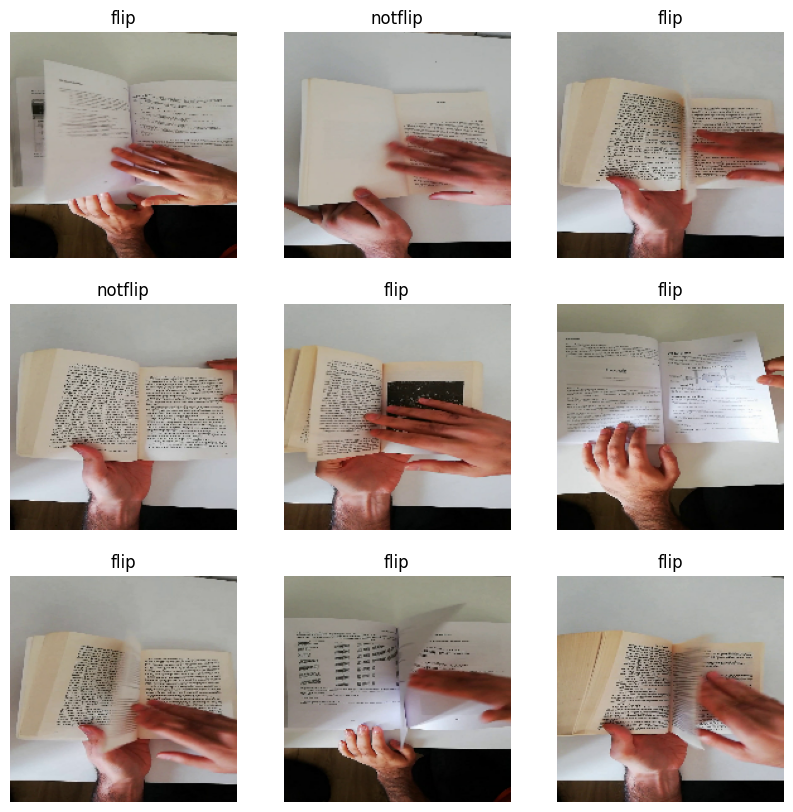

In [5]:
# Displaying a Subset of Training Data

# Utilizing Matplotlib, showcase the initial 9 images from the training dataset.
import matplotlib.pyplot as plt

# Set up the plot dimensions
plt.figure(figsize=(10, 10))

# Retrieve the first batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    # Iterate through the first 9 images
    for i in range(9):
        # Create a subplot for each image
        ax = plt.subplot(3, 3, i + 1)

        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Assign the corresponding class name as the title
        plt.title(train_ds.class_names[labels[i]])

        # Turn off the axis for better visualization
        plt.axis('off')


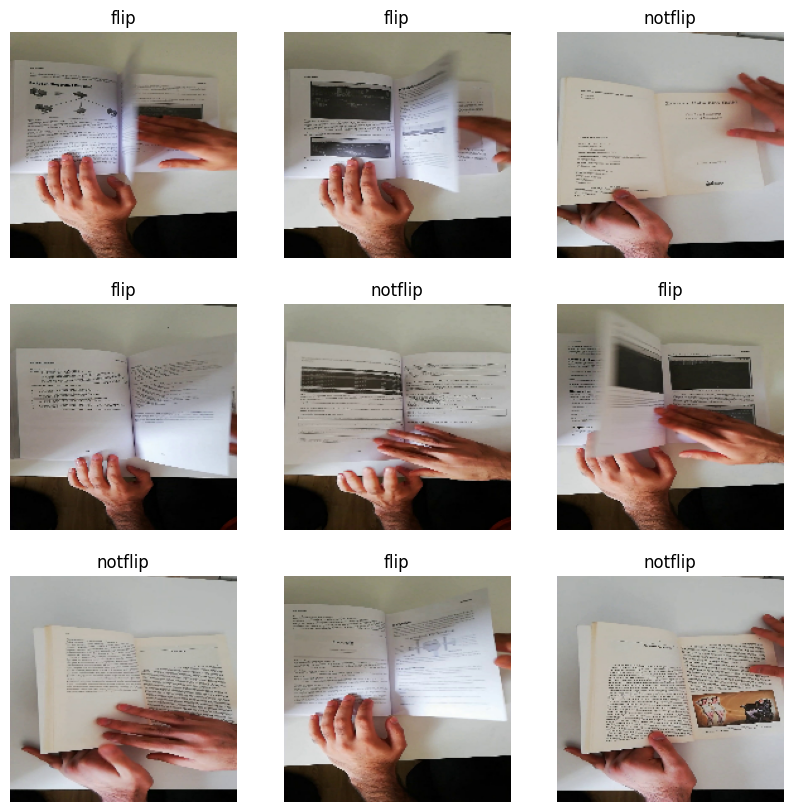

In [6]:
# Displaying a Subset of Test Data

# Use Matplotlib to present the initial 9 images from the test dataset.
import matplotlib.pyplot as plt

# Set up the plot dimensions
plt.figure(figsize=(10, 10))

# Retrieve the first batch of images and labels from the test dataset
for images, labels in test_ds.take(1):
    # Iterate through the first 9 images
    for i in range(9):
        # Create a subplot for each image
        ax = plt.subplot(3, 3, i + 1)

        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Assign the corresponding class name as the title
        plt.title(test_ds.class_names[labels[i]])

        # Turn off the axis for better visualization
        plt.axis('off')


In [7]:
# Examining the Dimensions of Train Data

# To understand the structure of the training dataset, inspect the shape of a batch.
for image_batch, labels_batch in train_ds.take(1):
    # Output the shape of the batch of images and labels
    print("Shape of Image Batch:", image_batch.shape)
    print("Shape of Labels Batch:", labels_batch.shape)


Shape of Image Batch: (32, 180, 180, 3)
Shape of Labels Batch: (32,)


In [8]:
# Inspecting the Dimensions of Test Data

# Gain insights into the structure of the test dataset by examining the shape of a batch.
for image_batch, labels_batch in test_ds.take(1):
    # Output the shape of the batch of images and labels
    print("Shape of Image Batch:", image_batch.shape)
    print("Shape of Labels Batch:", labels_batch.shape)


Shape of Image Batch: (32, 180, 180, 3)
Shape of Labels Batch: (32,)


#####The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The labels_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

##Data Normalization

######Normalization is a scaling technique that involves shifting and rescaling values to fit within the range of 0 to 1.
######The RGB channel values typically fall within the [0, 255] range, which is suboptimal for neural networks.
######To address this, the values will be standardized to lie within the [0, 1] range using tf.keras.layers.Rescaling:

In [9]:
# Establishing a Normalization Layer

# Define a normalization layer using tf.keras.layers.Rescaling(1./255).
# creating a normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
# Apply the normalization layer to the training dataset (train_ds).
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Retrieve an image batch and labels from the normalized training dataset.
image_batch, labels_batch = next(iter(normalized_train_ds))

# Access the first image in the batch and print its minimum and maximum values.
first_image = image_batch[0]
print("Minimum Pixel Value:", np.min(first_image))
print("Maximum Pixel Value:", np.max(first_image))

Minimum Pixel Value: 0.0
Maximum Pixel Value: 0.9686275


In [11]:
# Implementing Normalization on Test Data

# Utilize the normalization layer on the testing dataset (test_ds).
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Extract an image batch and corresponding labels from the normalized testing dataset.
image_batch, labels_batch = next(iter(normalized_test_ds))

# Retrieve the first image in the batch and print its minimum and maximum pixel values.
first_image = image_batch[0]
print("Minimum Pixel Value:", np.min(first_image))
print("Maximum Pixel Value:", np.max(first_image))


Minimum Pixel Value: 0.0
Maximum Pixel Value: 0.9568647


## Model Creation

#####Given the project's straightforward objective and the well-organized nature of our data, I've opted for a simple model approach rather than a complex one, aiming to assess its performance effectively.

#####The model under construction follows a Keras Sequential architecture, comprising three convolution blocks (tf.keras.layers.Conv2D), each accompanied by a max pooling layer (tf.keras.layers.MaxPooling2D). At the top, there's a fully-connected layer (tf.keras.layers.Dense) with 128 units, activated by a ReLU activation function ('relu'). The final layer is another fully-connected layer (tf.keras.layers.Dense) with a single unit and a Sigmoid activation function.

In [12]:
# Constructing the Model Architecture

# Create a sequential model that comprises various layers for image classification.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##Creating F1-Score Metric

##### A requirement in the project is to evaluate the performance of the model using the F1-score. The goal of the F1 score is to combine the precision and recall metrics into a single metric (the harmonic mean). At the same time, the F1 score has been designed to work well on imbalanced data.

##### The F1-Score is not part of the Keras metrics so I've written a function with the help of keras.backend that I found in an article from medium.


In [13]:
# imporing keras.backend to create F1-Score
import keras.backend as K

# Function to calculate F1-Score
def calculate_f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


##Compile the Model

#####During the compilation phase, I employed the Adam optimizer to govern the network updates based on the chosen loss function. Opting for Binary Crossentropy as the loss function was ideal for classification tasks involving only two classes. To comprehensively assess the model's performance, I included both F1-Score and Accuracy as metrics.

In [14]:

# Compiling the Model

# Configure the model for training by specifying the optimizer, loss function, and additional metrics.

# Use the Adam optimizer, binary crossentropy as the loss function, and include accuracy and custom F1-Score metrics.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', calculate_f1_score])

# Display a summary of the model architecture.
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)        0

##Train the Model


#####In this step, the model will be trained on the normalized_train_ds for 10 epochs and will be evaluated on the normalized_test_ds as the validation data and evaluated as per the metrics specified in the model which are the Accuracy and the F1-Score.

In [15]:
# Training the Model

# Train the model using the normalized training dataset and validate it on the normalized testing dataset.
# The training process is executed for a total of 10 epochs.

history = model.fit(normalized_train_ds, validation_data=normalized_test_ds, epochs=10)


Epoch 1/10
75/75 [==============================] - 287s 4s/step - loss: 0.6742 - accuracy: 0.5916 - calculate_f1_score: 0.5500 - val_loss: 0.5702 - val_accuracy: 0.7035 - val_calculate_f1_score: 0.6213
Epoch 2/10
75/75 [==============================] - 33s 410ms/step - loss: 0.3409 - accuracy: 0.8587 - calculate_f1_score: 0.8642 - val_loss: 0.2443 - val_accuracy: 0.9095 - val_calculate_f1_score: 0.9004
Epoch 3/10
75/75 [==============================] - 29s 352ms/step - loss: 0.1585 - accuracy: 0.9398 - calculate_f1_score: 0.9402 - val_loss: 0.1546 - val_accuracy: 0.9380 - val_calculate_f1_score: 0.9407
Epoch 4/10
75/75 [==============================] - 28s 351ms/step - loss: 0.0880 - accuracy: 0.9695 - calculate_f1_score: 0.9698 - val_loss: 0.1147 - val_accuracy: 0.9548 - val_calculate_f1_score: 0.9571
Epoch 5/10
75/75 [==============================] - 29s 346ms/step - loss: 0.0596 - accuracy: 0.9812 - calculate_f1_score: 0.9813 - val_loss: 0.0531 - val_accuracy: 0.9832 - val_calc

In [16]:
# Evaluate Model Performance

# Output the maximum accuracy achieved by the model on the training and testing datasets.
print(f"The maximum accuracy on the training data: {np.max(history.history['accuracy']):.4f}")
print(f"The maximum accuracy on the testing data: {np.max(history.history['val_accuracy']):.4f}")

# Output the maximum F1-Score achieved by the model on the training and testing datasets.
print(f"\nThe maximum F1-Score on the training data: {np.max(history.history['calculate_f1_score']):.4f}")
print(f"The maximum F1-Score on the testing data: {np.max(history.history['val_calculate_f1_score']):.4f}")


The maximum accuracy on the training data: 0.9996
The maximum accuracy on the testing data: 0.9933

The maximum F1-Score on the training data: 0.9996
The maximum F1-Score on the testing data: 0.9934


##Visualization of Training Results

#####The training loss serves as a metric to evaluate how well a deep learning model aligns with the training data, while the validation loss assesses the model's performance on the validation set. The plots depicting training and testing loss are regarded as optimization learning curves, offering insights into the model optimization process and aiding in the identification of underfitting and overfitting tendencies. Conversely, the plots for training and testing serve as performance learning curves, shedding light on the model's generalization capabilities and facilitating the monitoring of underfitting and overfitting scenarios

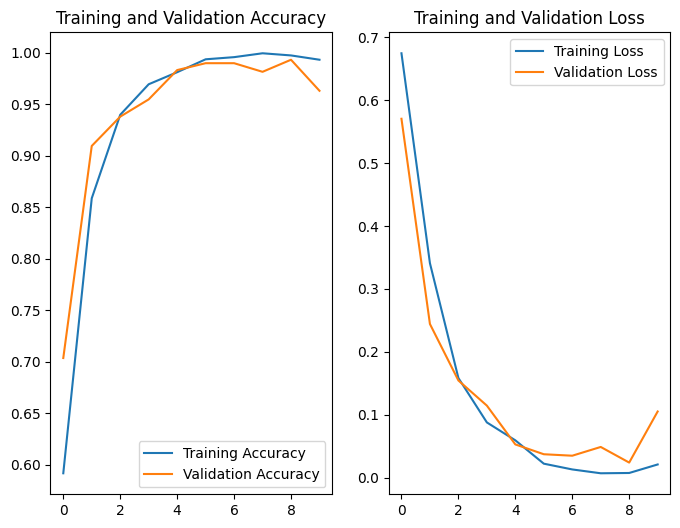

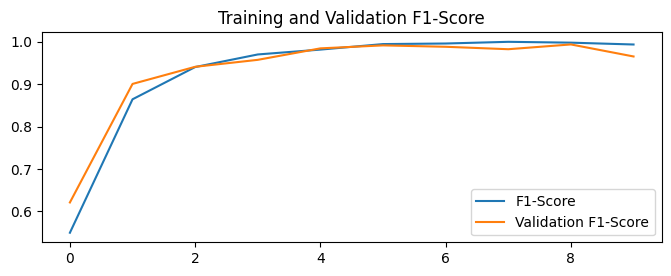

In [17]:
# Visualizing Model Training Performance

# Extract training history metrics for accuracy, loss, and F1-Score.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

f1 = history.history['calculate_f1_score']
val_f1 = history.history['val_calculate_f1_score']

# Define the range of epochs (here, 10 epochs).
epochs_range = range(10)

# Plot the training and validation accuracy in a subplot.
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss in another subplot.
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation F1-Score in a separate subplot.
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.plot(epochs_range, f1, label='F1-Score')
plt.plot(epochs_range, val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.title("Training and Validation F1-Score")
plt.show()


##Conclusion

#####MonReader stands as a groundbreaking mobile document digitization solution catering to the visually impaired, researchers, and anyone requiring fully automated, rapid, and high-quality bulk document scanning. Comprising a mobile app, MonReader simplifies the user experience—flipping pages is the sole user task, with the application seamlessly handling the rest. MonReader's capabilities encompass detecting page flips from a low-resolution camera preview, capturing high-resolution document images, recognizing corners, cropping appropriately, dewarping for a bird's eye view, enhancing text-background contrast, and finally, preserving formatted text through recognition, further refined by MonReader's ML-powered redactor.

#####The project's primary focus was advancing page flipping technology and predicting page flips from low-resolution images. The dataset, generously provided by the company, consisted of labeled images indicating flip and nonflip scenarios. The workflow commenced with loading the data into distinct training and testing datasets, followed by resizing and rescaling images to lower dimensions for simplified modeling and computational efficiency. Ultimately, a custom Convolutional Neural Network (CNN) model was crafted and applied to the data, producing the following outcomes:

*   The maximum accuracy on the training data: 0.9996
*   The maximum accuracy on the testing data: 0.9933
*   The maximum F1-Score on the training data: 0.9996
*   The maximum F1-Score on the testing data: 0.9934


